In [13]:
from PIL import Image
from io import BytesIO
from IPython import display
import numpy as np

def display_image(arr):
    arr = arr.reshape((64, 64)) * 255
    b = BytesIO()
    Image.fromarray(np.uint8(arr)).save(b, format='png')
    data = b.getvalue()
    display.display(display.Image(data=data, format='png', embed=True))

In [9]:
import shogicam.data
import shogicam.util
from shogicam.constant import *

data = shogicam.data.load_validation_board_data('../data/board')
data_sente = shogicam.data.load_validation_board_data('../data/board', True)

x_all = np.empty((0, 64, 64, 1))
y_all = np.empty((0, data[0][1].shape[1]))
for (x, y) in data:
    x_all = np.r_[x_all, x]
    y_all = np.r_[y_all, y]

In [43]:
from scipy.ndimage.interpolation import zoom
# display_image(x_all[0])
# zoomed = zoom(x_all[0], 1.3)
# shp = zoomed.shape
# xstart = int((shp[0] - 64) / 2)
# ystart = int((shp[1] - 64) / 2)
# zoomed = zoomed[xstart:(xstart + 64), ystart:(ystart + 64), :]
# display_image(zoomed)

def zoom_images(imgs, scale=1.3):
    ret = []
    for img in imgs:
        zoomed = zoom(img.reshape(64, 64), scale)
        shp = zoomed.shape
        xstart = int((shp[0] - 64) / 2)
        ystart = int((shp[1] - 64) / 2)
        ret.append(zoomed[xstart:(xstart + 64), ystart:(ystart + 64)].reshape((64, 64, 1)))
    return np.array(ret)

In [37]:
from keras.models import load_model

# model = load_model('../models/purple.h5')
model = load_model('../models/blue.h5')

In [53]:
n_all = 0
acc_all = 0.0
for (x, y) in data:
#     print(model.evaluate(x, y, verbose=False))
#     print(model.evaluate(zoom_images(x, 1.1), y, verbose=False))
#     print(model.evaluate(zoom_images(x, 1.2), y, verbose=False))
#     print(model.evaluate(zoom_images(x, 1.3), y, verbose=False))
#     print(model.evaluate(zoom_images(x, 1.4), y, verbose=False))
#     print(model.evaluate(zoom_images(x, 1.5), y, verbose=False))
    loss, acc = model.evaluate(x, y, verbose=False)
    losses = [loss]
    accs = [acc]

    scales = [1.1, 1.2, 1.3, 1.4, 1.5]
    for scale in scales:
        loss, acc = model.evaluate(zoom_images(x, scale), y, verbose=False)
        losses.append(loss)
        accs.append(acc)
    print(accs)

    acc = accs[np.argmin(losses)]
#     print(np.argmin(losses))
    print(acc)
    n_all += len(x)
    acc_all += len(x) * acc

print(acc_all / n_all)
# print(model.evaluate(x_all, y_all, verbose=False))
# print(model.evaluate(zoom_images(x_all), y_all, verbose=False))

/usr/local/lib/python3.5/dist-packages/scipy/ndimage/interpolation.py:600: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


[0.92105263471603394, 0.92105263471603394, 0.94736842732680471, 0.94736842732680471, 0.89473684837943634, 0.89473684837943634]
0.947368427327
[0.56410256868753683, 0.89743590202087009, 0.92307692766189575, 0.87179487637984443, 0.87179487790816867, 0.84615385226714301]
0.923076927662
[0.86486486647580119, 0.97297297297297303, 0.97297297297297303, 0.94594594755688233, 0.94594594594594594, 0.97297297297297303]
0.945945945946
[0.6875, 0.65625, 0.90625, 0.875, 0.625, 0.59375]
0.90625
[0.7142857142857143, 0.77142857228006634, 0.57142857228006638, 0.5428571437086378, 0.20000000000000001, 0.20000000000000001]
0.77142857228
[0.5, 0.58823529411764708, 0.73529411764705888, 0.73529411764705888, 0.76470588235294112, 0.8529411764705882]
0.852941176471
[0.80000007152557373, 0.86666673421859741, 0.80000007152557373, 0.90000009536743164, 0.90000009536743164, 0.93333339691162109]
0.866666734219
[0.62857142857142856, 0.7142857142857143, 0.74285714285714288, 0.77142857142857146, 0.8285714294229235, 0.7142

In [ ]:
pred_arr = model.predict(x_all)
res = np.argmax(pred_arr, axis=1)
ans = np.argmax(y_all, axis=1)
correct = np.where(res == ans)[0]
errors = np.where(res != ans)[0]

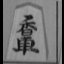

角


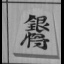

桂


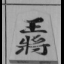

王


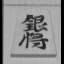

桂


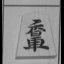

杏


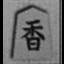

王


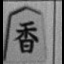

王


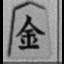

全


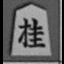

歩


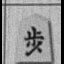

杏


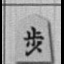

杏


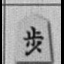

杏


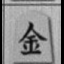

全


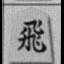

杏


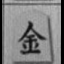

全


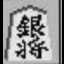

龍


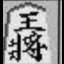

王


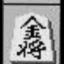

全


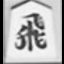

龍


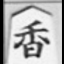

王


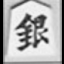

龍


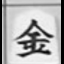

全


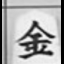

全


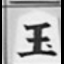

王


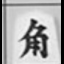

桂


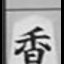

杏


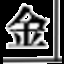

玉


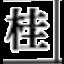

角


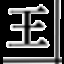

王


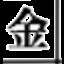

王


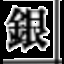

桂


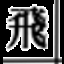

角


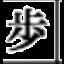

桂


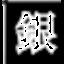

と


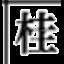

玉


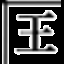

玉


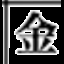

玉


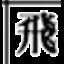

角


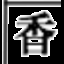

玉


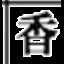

玉


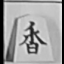

金


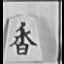

杏


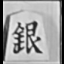

龍


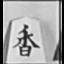

桂


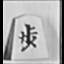

桂


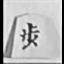

杏


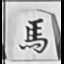

王


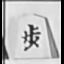

と


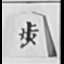

龍


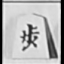

桂


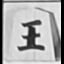

玉


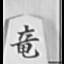

杏


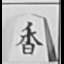

圭


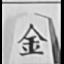

全


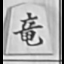

杏


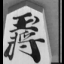

王


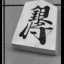

角


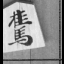

香


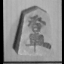

王


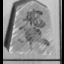

歩


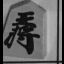

角


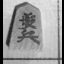

角


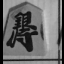

角


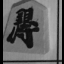

金


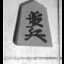

銀


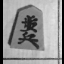

桂


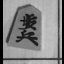

角


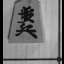

銀


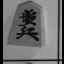

角


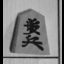

玉


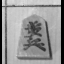

銀


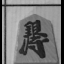

金


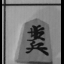

全


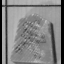

馬


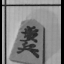

全


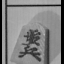

全


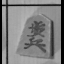

全


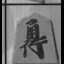

金


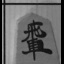

香


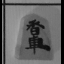

金


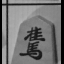

全


In [5]:
for e in errors:
    display_image(x_sente[e][:, :, 0] * 256)
    print(LABELS_JA[res[e]])